In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('Data/Boston.csv')

In [97]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [98]:
target = 'medv'
y = df[target]

In [99]:
df = pd.get_dummies(df,columns=['rad'])

In [100]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones':predicciones,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.predicciones, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.predicciones, grouped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

In [101]:
X = df.copy()
X = X.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [102]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('nn', MLPRegressor()),
])

# Params grid
params_grid = {
    'poly__degree':[1, 2, 3],
     'nn__hidden_layer_sizes': [(50,50,50), (10,), (100,), (10,10)],
     'nn__activation': ['tanh', 'relu', 'logistic'],
     'nn__alpha': [0.1, 0.01]
}

# Fit 
grid_nn = GridSearchCV(estimator=pipeline, n_jobs=-1, cv=5, scoring= 'r2', param_grid=params_grid)

grid_nn.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('nn', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'nn__activation': ['tanh', 'relu', 'logistic'],
                         'nn__alpha': [0.1, 0.01],
                         'nn__hidden_layer_sizes': [(50, 50, 50), (10,), (100,),
                                                    (10, 10)],
                         'poly__degree': [1, 2, 3]},
             scoring='r2')

In [103]:
grid_nn.best_params_

{'nn__activation': 'relu',
 'nn__alpha': 0.01,
 'nn__hidden_layer_sizes': (50, 50, 50),
 'poly__degree': 2}

In [104]:
predicciones_nn = grid_nn.best_estimator_.predict(X_test)

r2_score(y_pred=predicciones_nn, y_true=y_test)

0.8601076985481964

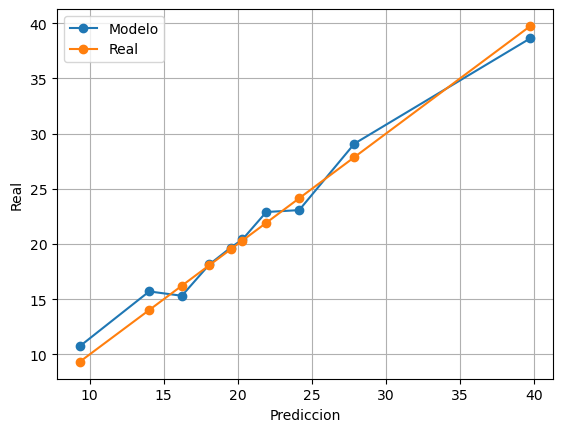

In [105]:
calibracion(predicciones_nn, y_test, 10)

# Conclusiones

Haciendo la red neuronal para este dataset, la mejor activación fue la de relu con un alpha de 0.01 y polinomio de grado 2, haciendo prueba y error el mejor modelo que pude obtener fue utilizando tres capas con 50 neuronas cada una, con un r2 de 0.86010, que nos dice que el 86.01% de la variabilidad de los datos es explicada por este modelo utilizando una red neuronal.